
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Time Series Analysis 

### Time Series Analysis for Subsurface Modeling in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### PGE 383 Exercise: Time Series Analysis for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of time series analysis for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about time series analysis.  

#### Time Series Analysis

Time series analysis for learning from time series data.  Here are some key aspects of support vector machines.

**One Dimensional**

* whereas spatial data is typically in 2 or 3 dimensions, time series data is fundamentally a 1D dataset with measures over $y(\bf{u_{\alpha}})$, for $\alpha = 1, \dots, n$

**Decomposition**

* time series data are often nonstationary with separate additive or multiplicative trend, seasonal and residual components.

* any model will need to account for each of these components

**Autocorrelation**

* the autocorrelation is commonly applied to quantify the degree information shared over intervals of time
    
**Moving Windows**

* moving window statistics are often applied to analyze changes over time

##### Applications to subsurface modeling

There are a variety of time series data applied in subsurface modeling.  Production data including rates and compositions of produced fluids are common.

#### Workflow Goals

Learn the basics of time series analysis in Python to for analysis, modeling and prediction with production data. This includes:

* Generating and formating a time series dataset

* Basic visualization

* Autocorrelation analysis

* Trend modeling and differencing

* ARIMA modeling and forecasting

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
#import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
os.chdir("c:/PGE383")                     # set the working directory

#### Generating a Synthetic Time Series

We will build a simple time series representating production from a set of wells. 

* We will use an additive model with trend, cycles and stochastic features

* I have left this here to allow you to change the synthetic dataset and experiment with the following analysis


 Data for SGSIM: Number of acceptable data     = 10
                 Number trimmed                = 0
                 Weighted Average              = 9.9621
                 Weighted Variance             = 0.0
                 Weighted Transformed Average  = 9.9621
                 Weighted Transformed Variance = 0.0
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 100
   currently on node 200
   currently on node 300
   currently on node 400
   currently on node 500
   currently on node 600
   currently on node 700
   currently on node 800
   currently on node 900
Reassigning data to nodes

 Realization 0: number   = 1000
                                   mean     = 0.06 (close to 0.0?)
                                   variance = 0.9846 (close to gammabar(V,V)? approx. 1.0)


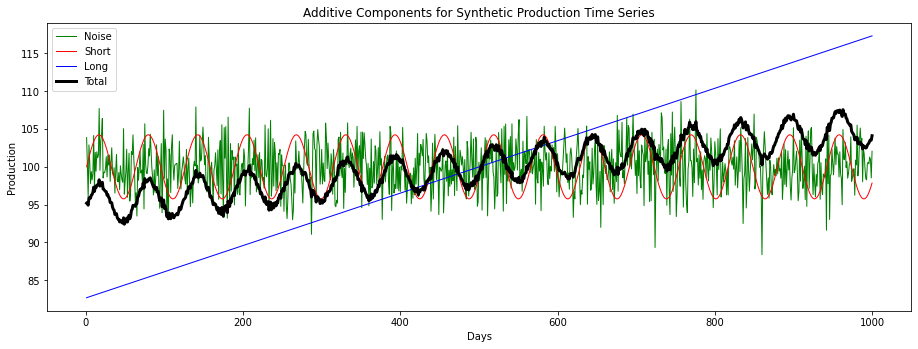

In [5]:
# Grid specificaton
nx = 1000; ny = 1; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
xmin = 0.0; xmax = nx*xsiz; ymin = 0.0; ymax = ny*ysiz; cmap = plt.cm.inferno

# Geostatistical simulation parameters
ndmin = 0; ndmax = 30; radius = 1000; ktype = 0; skmean = 0
tmin = -999; tmax = 999
     
# An array with the days listed
x_value = np.linspace(1,nx,nx)
   
# Spatial continuity models 
vario_noise = GSLIB.make_variogram(nug=1.0,nst=1,it1=1,cc1=0.0,azi1=0.0,hmaj1=1,hmin1=1) 
vario_short = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0.0,hmaj1=100,hmin1=100) 
#vario_long = GSLIB.make_variogram(nug=0.001,nst=1,it1=3,cc1=0.999,azi1=0.0,hmaj1=2000,hmin1=2000)    

x = np.ones(10)*-9999                                                    # extract porosity column as vector
y = np.ones(10)*-9999                                                    # extract permeability column as vector
value = np.random.normal(10)
df_null = pd.DataFrame({'x': x, 'y': y, 'value':value}) # make a new DataFrame from the vectors

# Simulate a noise field
series_noise = geostats.sgsim(df_null,'x','y','value',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=0,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=75053,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=1,nmult=3,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=201,mxcty=201,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario_noise)[0]

# Correct the mean and variance of the noise field
series_noise = GSLIB.affine(series_noise,100,3)

# Calculate a cyclic component
series_short = np.sin(np.linspace(0,nx*xsiz,nx)/100)

# Correct the cyclic component mean and variance
series_short = GSLIB.affine(series_short,100,3)

# Calculate a long range component
#series_long = geostats.sgsim(df_null,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
#            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
#            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=75053,
#            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=1,nmult=3,noct=-1,radius=radius,radius1=1,sang1=0,
#            mxctx=201,mxcty=201,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario_long)[0]

# Calculate a simple linear trend component and correct the mean and variance
series_long = x_value; series_long = GSLIB.affine(series_long,100,10)

# Combine all 3 components with a simple additive model
wt_long = 0.3; wt_short = 0.6; wt_noise = 1 - wt_long - wt_short
series_total = wt_long * series_long + wt_short * series_short + wt_noise * series_noise

#series_total = GSLIB.affine(series_total,100,10)

plt.subplot(1,1,1)
plt.plot(x_value,series_noise,color='green',linewidth=1,label = 'Noise')
plt.plot(x_value,series_short,color='red',linewidth=1, label = 'Short')
plt.plot(x_value,series_long,color='blue',linewidth=1, label = 'Long')
plt.plot(x_value,series_total,color='black',linewidth=3, label = 'Total')
plt.legend(loc='best'); plt.xlabel('Days'); plt.ylabel('Production'); plt.title('Additive Components for Synthetic Production Time Series')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Make a Time Series DataFrame

Let's make a data frame with the production data and indexed by date of the production.

In [6]:
periods = nx
date = pd.date_range('2016-01-01', periods=periods, freq='D')

df = pd.DataFrame({'date':date[:],'production':series_total[:]})

df = df.set_index(['date'])
x_value = x_value

df.head()

,production
date,
2016-01-01,95.192176
2016-01-02,95.099356
2016-01-03,94.928115
2016-01-04,95.878772
2016-01-05,95.893400


We can take advantage of the ability to easily work with and plot time series data with Pandas DataFrames.

<AxesSubplot:xlabel='date'>

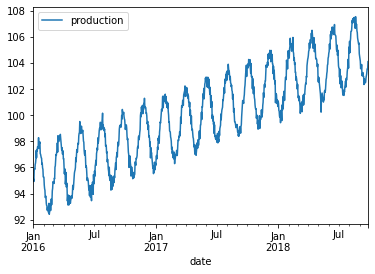

In [7]:
df.plot()

We will also make our own custom plots. Check out this one.

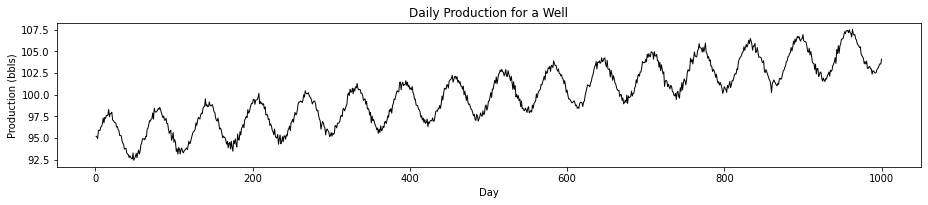

In [8]:
plt.subplot(1,1,1)
plt.plot(x_value,df['production'].values,color='black',linewidth=1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
plt.title('Daily Production for a Well'); plt.xlabel('Day'); plt.ylabel('Production (bbls)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.5, wspace=0.2, hspace=0.2)
plt.show()

#### Autocorrelation

Autocorrelation is applied in time series analysis to detect relationships over lags in time.  The autocorrelation is the correlogram (standardized covariance function) commonly used in geostatistics applied to the one dimensional time series data.

Also, for construction of a predictive model we must establish the presence of autocorrelation between residual values.
* we will use the autocorrelation and partial autocorrelations of our residual

The partial autocorrelation provides a measure of the correlation after removal of differences observed in previous lags

* measure of correlation at lag $ = n$, after removing the effects explained over lags $ 1, \ldots, n-1$.

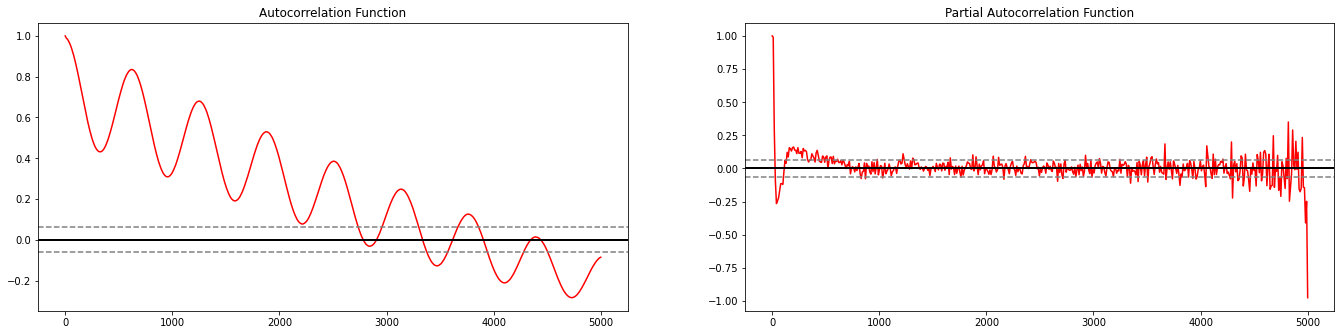

In [12]:
from statsmodels.tsa.stattools import acf, pacf
nlags = 499
lag_acf = acf(df['production'], nlags=nlags)
lag_pacf = pacf(df['production'], nlags=nlags, method='ols')
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lags,lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lags,lag_pacf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)

#### Test for Stationarity

Is this dataset stationary? Does the mean change locally? We use the Dickey-Fuller Test to test for stationarity of our time series with the following hypotheses:

* $H_0 =$ time series is non-stationary
* $H_1 =$ time series is stationary

If the **Test Statistic** is less then the **Critical Value** at an alpha level (1 - significance level) then we reject the null hypothesis and state that the time series is stationary.

In [8]:
print('Dickey-Fuller Test Results:')
dftest = adfuller(df['production'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                  -1.216860
p-value                          0.666301
#Lags Used                      22.000000
Number of Observations Used    977.000000
Critical Value (1%)             -3.437061
Critical Value (5%)             -2.864503
Critical Value (10%)            -2.568348
dtype: float64


Since the test statistic within the +/- the critical value interval (at 5%) and the p-value is > 5% we would fail to reject the null hypothesis that the dataset is stationary, we assume it is nonstationary.

* What do we need to do about our nonstationary time series data?

#### Stationarity Transformations for Time Series

Most time series models (like spatial models) require a stationarity assumption.

To transform time series to stationary we must model and remove:

* trends - locally variable mean over the domain of the time series
* seasonality - repeating cycles with a specific wavelength

#### Rolling Statistics

We calculate moving window statistics to evaluate the local change in these statistics.  

* visually observe the local changes continuously over the time series
* can be calculated on a wide range of statistics

We will evaluate the moving window mean and sample standard deviation over a window of 20 days.

* assuming a uniform weighting of the statististics
* could consider triangular and Gaussian weighting templates for smoother results

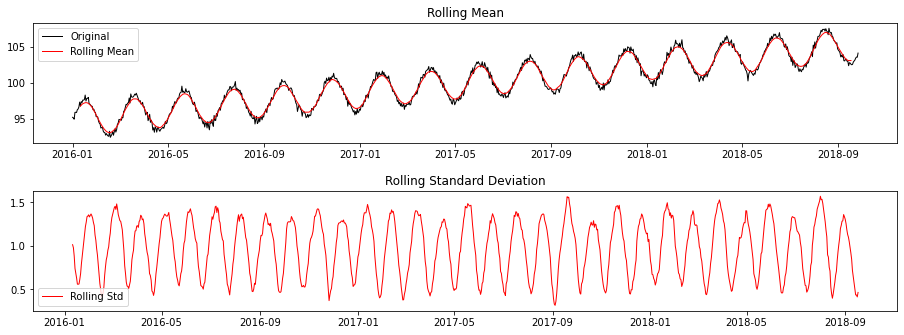

In [9]:
window_size = 20                        # assume window size of 10 days

#Determing rolling statistics
rolling_mean = df.rolling(window = window_size, center = True).mean()
rolling_std = df.rolling(window = window_size, center = True).std()
rolling_P025 = df.rolling(window = window_size, center = True).quantile(.025)
rolling_P975 = df.rolling(window = window_size, center = True).quantile(.975)

#Plot rolling statistics:
plt.subplot(211)
orig = plt.plot(df['production'], color='black',linewidth = 1, label='Original')
mean = plt.plot(rolling_mean['production'], color='red', linewidth = 1, label='Rolling Mean')
#P025 = plt.plot(rolling_P025, color='grey', linewidth = 1, label='Rolling P025')
#P975 = plt.plot(rolling_P975, color='grey', linewidth = 1, label='Rolling P975')
plt.title('Rolling Mean'); plt.legend(loc='best')
    
plt.subplot(212)
std = plt.plot(rolling_std['production'], color='red', linewidth = 1, label = 'Rolling Std')
plt.legend(loc='best'); plt.title('Rolling Standard Deviation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.5, hspace=0.4)

#### Working with Residuals

Let's remove (subtract) the moving window average from the original production time series and calculate the residual.

In [10]:
df['rolling_mean'] = rolling_mean['production'].values
df['residual'] = df['production'].values - rolling_mean['production'].values
df.head(n=13)

,production,rolling_mean,residual
date,,,
2016-01-01,95.192176,NaN,NaN
2016-01-02,95.099356,NaN,NaN
2016-01-03,94.928115,NaN,NaN
2016-01-04,95.878772,NaN,NaN
2016-01-05,95.893400,NaN,NaN
2016-01-06,95.856754,NaN,NaN
2016-01-07,96.241906,NaN,NaN
2016-01-08,96.344841,NaN,NaN
2016-01-09,96.628213,NaN,NaN


We have some 'NaN', missing values because the moving window does not calculate values when the window overlaps with the edge of the data.  

* We will have to deal with these in the following workflow.

Now let's plot and visualize the residual.

* It should be more stationary

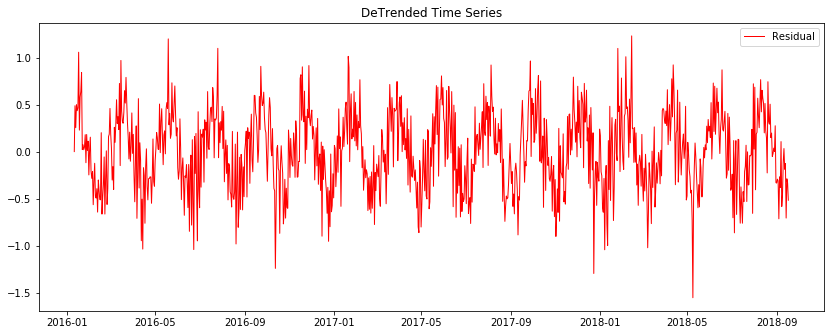

In [42]:
# Plot the detrended time series
plt.subplot(121)
orig = plt.plot(df['residual'], color='red',linewidth = 1, label='Residual')
plt.title('DeTrended Time Series'); plt.legend(loc='best')
plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.0, wspace=0.2, hspace=0.2)

The residual after we remove the trend is more stationary as anticipated.

Let's try a variety of window sizes.

* 20 days
* 40 days
* 100 days

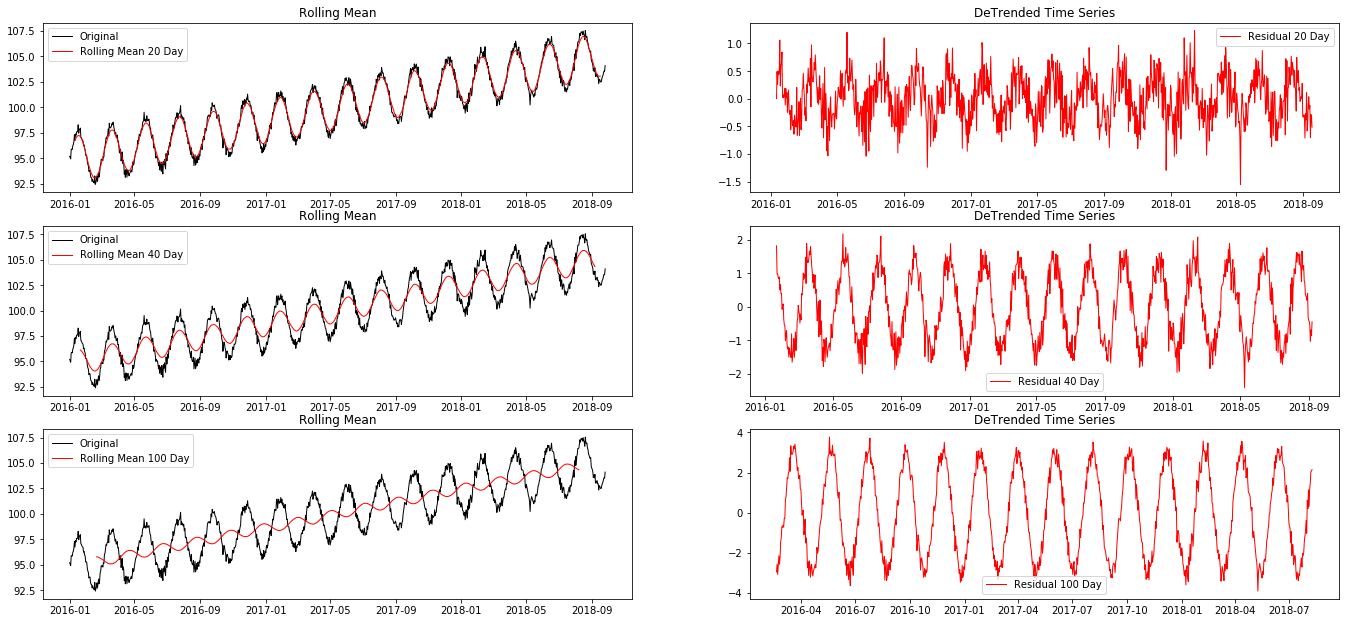

In [44]:
#Determing rolling statistics
rolling_mean_20 = df.rolling(window = 20, center = True).mean()
rolling_mean_40 = df.rolling(window = 40, center = True).mean()
rolling_mean_100 = df.rolling(window = 100, center = True).mean()

df['rolling_mean_20'] = rolling_mean_20['production'].values
df['residual_20'] = df['production'].values - rolling_mean_20['production'].values
df['rolling_mean_40'] = rolling_mean_40['production'].values
df['residual_40'] = df['production'].values - rolling_mean_40['production'].values
df['rolling_mean_100'] = rolling_mean_100['production'].values
df['residual_100'] = df['production'].values - rolling_mean_100['production'].values

#Plot rolling statistics:
plt.subplot(321)
plt.plot(df['production'], color='black',linewidth = 1, label='Original')
plt.plot(rolling_mean_20['production'], color='red', linewidth = 1, label='Rolling Mean 20 Day')
plt.title('Rolling Mean'); plt.legend(loc='best')
    
plt.subplot(322)
orig = plt.plot(df['residual_20'], color='red',linewidth = 1, label='Residual 20 Day')
plt.title('DeTrended Time Series'); plt.legend(loc='best')

plt.subplot(323)
plt.plot(df['production'], color='black',linewidth = 1, label='Original')
plt.plot(rolling_mean_40['production'], color='red', linewidth = 1, label='Rolling Mean 40 Day')
plt.title('Rolling Mean'); plt.legend(loc='best')
    
plt.subplot(324)
orig = plt.plot(df['residual_40'], color='red',linewidth = 1, label='Residual 40 Day')
plt.title('DeTrended Time Series'); plt.legend(loc='best')

plt.subplot(325)
plt.plot(df['production'], color='black',linewidth = 1, label='Original')
plt.plot(rolling_mean_100['production'], color='red', linewidth = 1, label='Rolling Mean 100 Day')
plt.title('Rolling Mean'); plt.legend(loc='best')
    
plt.subplot(326)
orig = plt.plot(df['residual_100'], color='red',linewidth = 1, label='Residual 100 Day')
plt.title('DeTrended Time Series'); plt.legend(loc='best')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.0, wspace=0.2, hspace=0.2)



#### Additivity of Variance - Trend and Residual Components

When we work with a trend and residual model we are decomposing the temporal phenomenon into:

1. deterministic trend - known
2. stochastic residual - unknown

We will calculated the proportion of variance in the trend and the residual.  This includes the following steps:

* calculate the representative weighted standard deviation of the original data, convert to variance, $\sigma$

* calculate the standard deviation of the trend model, convert to variance, $\sigma_t$

* calculate the variance of the residual at the data locations, $\sigma_r$ 

* back calculate the covariance form the relationship:

\begin{equation}
\sigma = \sigma_t + \sigma_r + 2 \times C_{tr}
\end{equation}

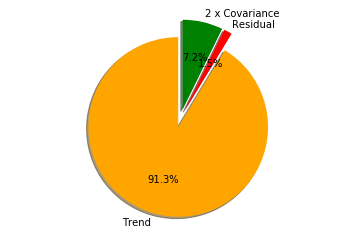

Production: Average                100.0
Production Trend: Average          100.0067
Production Residual: Average         0.0055


In [46]:
variance = np.var(df['production'])
variance_trend = np.var(df['rolling_mean'])
variance_residual = np.var(df['residual'])

prop_trend = variance_trend/variance
prop_resid = variance_residual/variance
prop_cov = 1 - prop_trend - prop_resid

variance_prop = [prop_trend, prop_resid, prop_cov]
labels = 'Trend', 'Residual', '2 x Covariance'
colors = 'orange', 'red', 'green'
explode = (0.1, 0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(variance_prop, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print('Production: Average                ' + str(round(np.mean(df['production']),4)))
print('Production Trend: Average          ' + str(round(np.mean(df['rolling_mean']),4)))
print('Production Residual: Average         ' + str(round(np.mean(df['residual']),4)))

#### Test for Stationarity on the De-trended Time Series

We use the Dickey-Fuller Test to test for stationarity of our detrened time series

* $H_0 =$ time series is non-stationary
* $H_1 =$ time series is stationary

If the **Test Statistic** is less then the **Critical Value** at an alpha level (1 - significance level) then we reject the null hypothesis and state that the time series is stationary.

In [47]:
print('Dickey-Fuller Test Results:')
residual = df['residual'] 
residual = residual[~pd.isnull(residual)]             # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                -1.292638e+01
p-value                        3.780191e-24
#Lags Used                     2.200000e+01
Number of Observations Used    9.580000e+02
Critical Value (1%)           -3.437194e+00
Critical Value (5%)           -2.864562e+00
Critical Value (10%)          -2.568379e+00
dtype: float64


Now we reject the null hypothesis, $H_0$, and state that the detrended time series is stationary.

#### Differencing to Remove Nonstationarity

Differencing is a common approach applied to tine series to remove nonstationarity. Differencing proceeds as:

$y(\bf{u_i}) = z(\bf{u}_{i+1}) - z(\bf{u}_i)$ 

where $z(\bf{u}_{i+1}) - z(\bf{u}_i)$ is the difference between the current and the next value in the time series.

NumPy has a function for differencing ndarrays.

```python
np.diff(df[0].values)
```

Comments on differencing:

* if the series is already stationary then there is no need to apply differencing

* the order of differencing is the number of differencing operations applied in sequence.  

    * first order is $y_1(\bf{u_i}) = z(\bf{u_{i+1}}) - z(\bf{u_i})$ 

    * second order is $y_2(\bf{u_i}) = y_1(\bf{u_{i+1}}) - y_1(\bf{u_i})$ 

    * third order is $y_3(\bf{u_i}) = y_2(\bf{u_{i+1}}) - y_2(\bf{u_i})$ 

We demonstrate differencing on our production dataset.

We will plot the autocorrelation of the result to demonstrate that we have actually removed the trend. 

* We talk more about autocorrelation below.  

* For now, let's just say autocorrelation is a measure of the correlation over time lags and is the same as the correlogram (standardized covariance function) used in geostatistics for spatial problems.

In [52]:
diff1 = np.diff(df['production'].values)
diff1 = np.append(diff1,diff1[diff1.size-1])          # double the last value to keep the length the same
df['first_difference'] = diff1

diff2 = np.diff(df['first_difference'].values)
diff2 = np.append(diff2,diff2[diff2.size-1])          # double the last value to keep the length the same
df['second_difference'] = diff2
df.head()

,production,rolling_mean,residual,rolling_mean_20,residual_20,rolling_mean_40,residual_40,rolling_mean_100,residual_100,first_difference,second_difference
date,,,,,,,,,,,
2016-01-01,95.192176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092820,-0.078421
2016-01-02,95.099356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.171241,1.121898
2016-01-03,94.928115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950657,-0.936029
2016-01-04,95.878772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014628,-0.051274
2016-01-05,95.893400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036646,0.421797


Now let's plot the:

* original
* first order
* second order

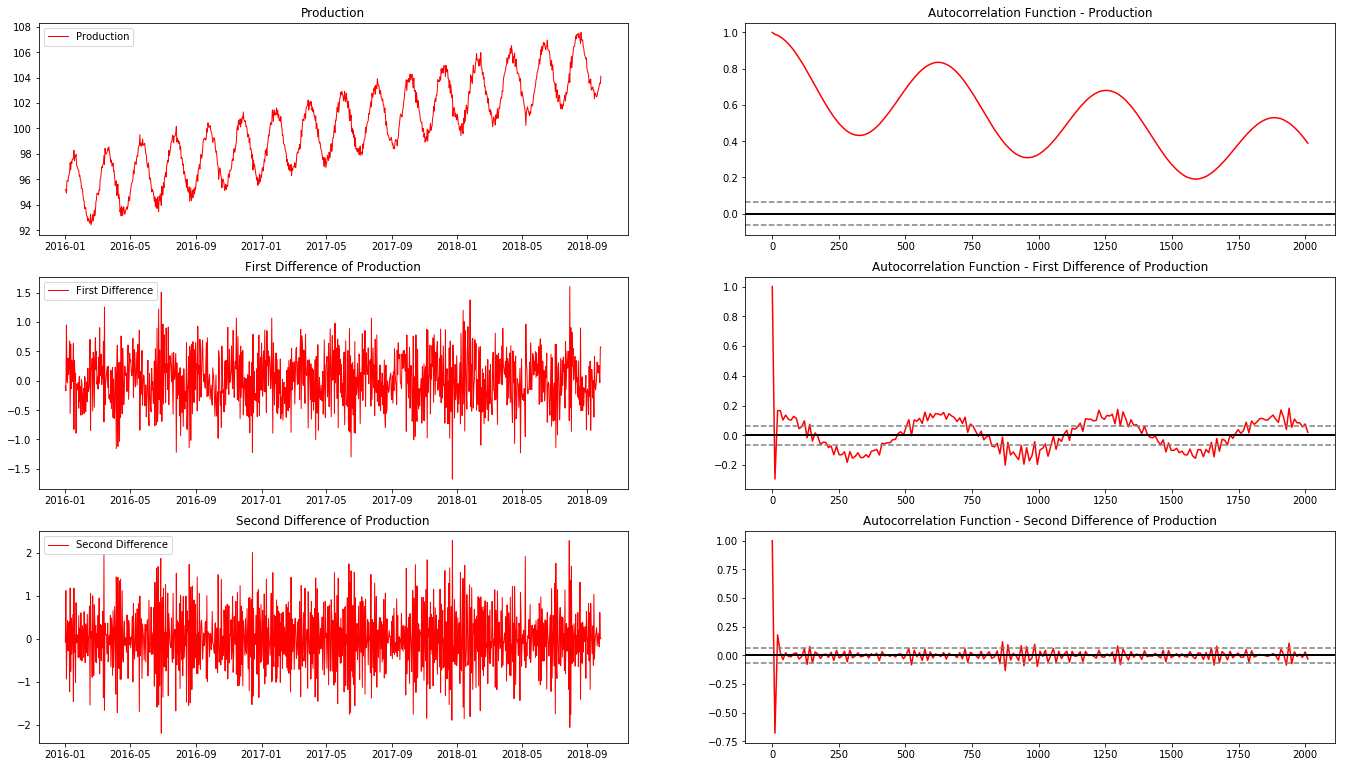

In [54]:
# Plot the first difference of the time series
from statsmodels.tsa.stattools import acf

nlags = 200
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

prod_lag_acf = acf(df['production'], nlags=nlags)
prod_d1_lag_acf = acf(df['first_difference'], nlags=nlags)
prod_d2_lag_acf = acf(df['second_difference'], nlags=nlags)

plt.subplot(321)
orig = plt.plot(df['production'], color='red',linewidth = 1, label='Production')
plt.title('Production'); plt.legend(loc='best')

plt.subplot(322) 
plt.plot(lags,prod_lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function - Production')

plt.subplot(323)
orig = plt.plot(df['first_difference'], color='red',linewidth = 1, label='First Difference')
plt.title('First Difference of Production'); plt.legend(loc='best')

plt.subplot(324) 
plt.plot(lags,prod_d1_lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function - First Difference of Production')

plt.subplot(325)
orig = plt.plot(df['second_difference'], color='red',linewidth = 1, label='Second Difference')
plt.title('Second Difference of Production'); plt.legend(loc='best')

plt.subplot(326) 
plt.plot(lags,prod_d2_lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function - Second Difference of Production')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)

Observe that the result becomes more stationary as we mover from original production to first difference and then to second difference.

The autocorrelation indicates that the temporal correlation is also removed.

#### Test for Stationarity on the First and Second Differenced Time Series

We use the Dickey-Fuller Test for stationarity of our first and second difference of our production time series

* $H_0 =$ time series is non-stationary
* $H_1 =$ time series is stationary

If the **Test Statistic** is less than the **Critical Value** at an alpha level (1 - significance level) then we reject the null hypothesis and state that the time series is stationary.

In [55]:
print('Dickey-Fuller Test Results - First Differenced Production:')
residual = df['first_difference'] 
residual = residual[~pd.isnull(residual)]             # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

print('Dickey-Fuller Test Results - Second Differenced Production:')
residual = df['second_difference'] 
residual = residual[~pd.isnull(residual)]             # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results - First Differenced Production:
Test Statistic                -1.485973e+01
p-value                        1.726550e-27
#Lags Used                     2.200000e+01
Number of Observations Used    9.770000e+02
Critical Value (1%)           -3.437061e+00
Critical Value (5%)           -2.864503e+00
Critical Value (10%)          -2.568348e+00
dtype: float64
Dickey-Fuller Test Results - Second Differenced Production:
Test Statistic                -6.167003e+00
p-value                        6.950917e-08
#Lags Used                     2.200000e+01
Number of Observations Used    9.770000e+02
Critical Value (1%)           -3.437061e+00
Critical Value (5%)           -2.864503e+00
Critical Value (10%)          -2.568348e+00
dtype: float64


Both the local moving window and differencing methods have demonstrated the ability to remove the trend in the production mean and provide a stationary dataset.

In general, any predictive model will:

* require a stationary time series dataset (assumes stationarity)

* first model and remove a nonstationary component and then work with the stationary residual or transform 

#### Time Series Decomposition

Let's demonstrate an automated method to decompose a time series into mulitple components. With time series decomposition we will decompose the time series into the following components.  

* trend
* seasonality
* noise / residual

We will use the [StatsModels](https://www.statsmodels.org/stable/index.html) package for statistical modeling in Python.

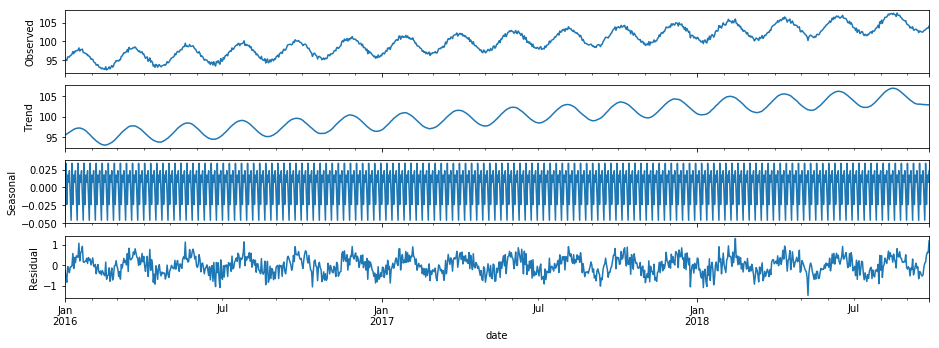

In [60]:
decomposition = seasonal_decompose(df['production'], model='additive',extrapolate_trend=1,filt=np.ones(20)/20,two_sided = True)
decomp_trend = decomposition.trend; decomp_seasonal = decomposition.seasonal; decomp_residual = decomposition.resid
fig = decomposition.plot()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's check for stationarity of the residual component from the above decomposition. We do this to comfirm that we have removed the nonstationarity through removal of the seasonal and trend components.

In [61]:
print('Dickey-Fuller Test Results:')
decomp_residual = decomp_residual[~pd.isnull(decomp_residual)]     # remove null values
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                -6.167003e+00
p-value                        6.950917e-08
#Lags Used                     2.200000e+01
Number of Observations Used    9.770000e+02
Critical Value (1%)           -3.437061e+00
Critical Value (5%)           -2.864503e+00
Critical Value (10%)          -2.568348e+00
dtype: float64


Once again we reject the null hypothesis, $H_0$, and state that the detrended time series is stationary.

* the time series decomposition method has successfully removed the non-stationarity in the mean of the time series

Let's confirm that the trend has been removed with the autocorrelation.

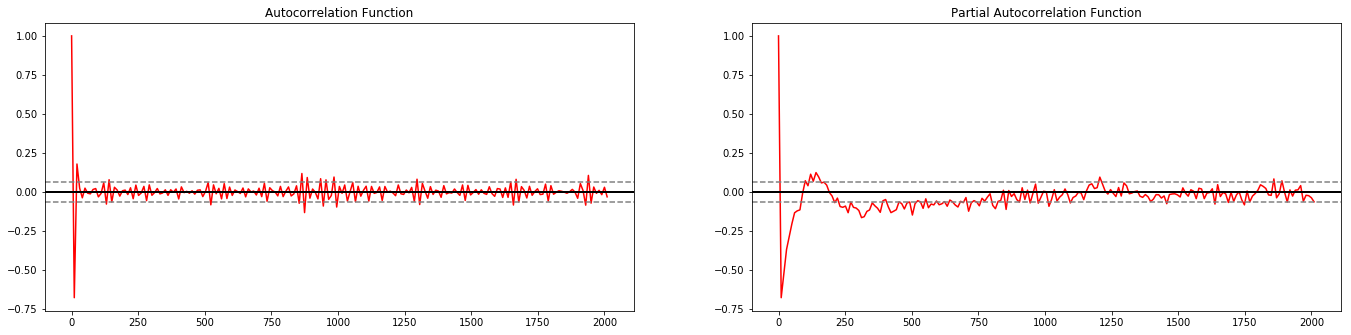

In [62]:
#from statsmodels.tsa.stattools import acf, pacf
nlags = 200
lag_acf = acf(residual, nlags=nlags)
lag_pacf = pacf(residual, nlags=nlags, method='ols')
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lags,lag_acf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lags,lag_pacf,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)

From these plots we can determine that there is no autocorrelation nor partial autocorrelation over any lag 

* the plot crosses the upper confidence interval for zero autocorrelation at lag = 1

What have we learned about our production data so far?

* there is a significant trend that can be removed with a moving window or first difference

* there is no significant autocorrelation of the 

#### ARIMA (Auto-Regressive Integrated Moving Average) Model for Time Series

The ARIMA model is based on the following parameters:

* number of auto-regressive terms (p) is the number of lags for autocorrelation - we find this from the number of significant lags in the partial autocorrelation.  There was only one lag (see above). $p=1$

* number of moving average terms (q) is the number of differencing required remove the trend.  From above we demonstrated that we had a stationary dataset after the first difference, but we improved the removal of the cycles after the second difference, let's use second difference.  $q = 2$

* number of nonseasonal differences (d) is the seasonal effect, our dataset did not show any significant seasonal cyclicity in the decomposition above, so we will just set it to one.  $d=1$ 


In [67]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

p = 1; d = 1; q = 2

ARIMA_model = ARIMA(df['production'], order=(p, d, q))  
ARIMA_model_fit = ARIMA_model.fit(transparams = False,disp=-1) 

print(ARIMA_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.production   No. Observations:                  999
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -475.894
Method:                       css-mle   S.D. of innovations              0.389
Date:                Sun, 10 Nov 2019   AIC                            961.787
Time:                        11:03:18   BIC                            986.321
Sample:                    01-02-2016   HQIC                           971.112
                         - 09-26-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0160      0.037      0.427      0.670      -0.057       0.089
ar.L1.D.production     0.9491      0.012     79.823      0.000       0.926       0.972
ma.L1.D.production  

Here's what we can interpret from above.  

* the coefficients AR.1, MA.1 and MA.2 are all significant, the model based on trend and autocorrelation is significant
* the constant is not significantly different from zero

Note the AIC is the Akaike Information Criteria (AIC) that quantifies:

1. the goodness of fit
2. the simplicity / parsimony

The lower the AIC the better.

Let's plot the residuals from our model to check for a constant mean (near zero) and variance.  

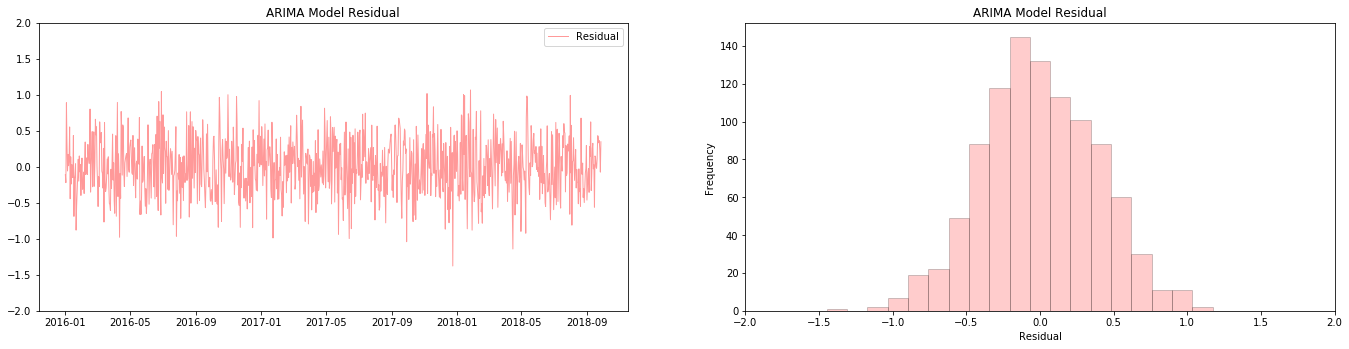

In [68]:
residuals = pd.DataFrame(ARIMA_model_fit .resid)
plt.subplot(121)

orig = plt.plot(residuals, color='red',linewidth = 1, label='Residual', alpha = 0.4)
plt.title('ARIMA Model Residual'); plt.legend(loc='best'); plt.ylim(-2,2)

plt.subplot(122)
plt.hist(residuals[0].values, bins = np.linspace(-2,2,30),color = 'red', alpha = 0.2,edgecolor = 'black')
plt.xlabel('Residual'); plt.ylabel('Frequency'); plt.title('ARIMA Model Residual'), plt.xlim(-2,2)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)

Let's look at the predictions from our model.

* this is the predictions our model would make if we trained with $y(\bf{u_{\alpha}})$, for $\alpha = 1, \dots, i-1$, to predict at $y(\bf{u_i})$ 

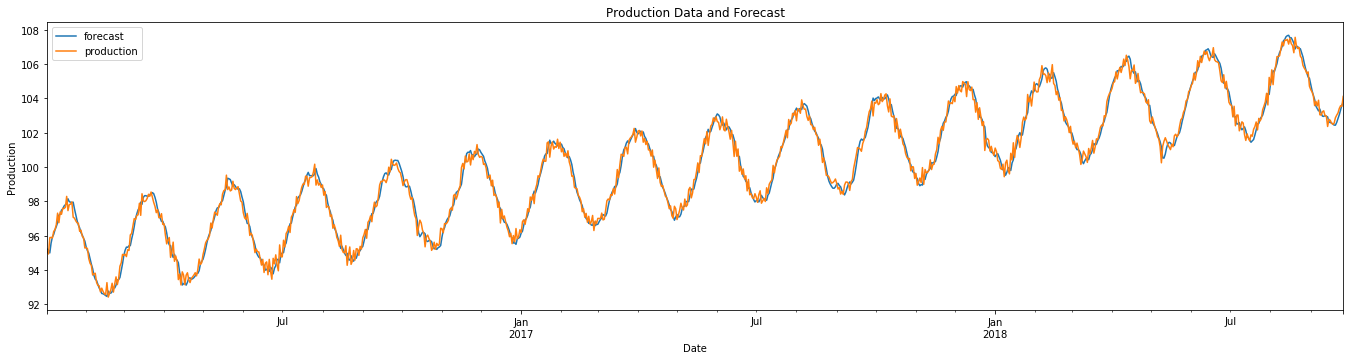

In [69]:
ARIMA_model_fit.plot_predict(dynamic=False)
plt.xlabel('Date'); plt.ylabel('Production'); plt.title('Production Data and Forecast')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)

#### Out-of-Time Cross Validation

Let's attempt an out-of-time cross validation.  To do this we will train with a fraction of the data and then forecast into the future.

* Let's train with the first 750 days and then forecast with the next 250 days.  
* It would not be fair to use random selection for test and train, because time series models are generally used for forecasts 

Let's first split the data into train and test DataFrames.

In [70]:
train = df.iloc[:750,0]
test = df.iloc[750:,0]

Let's visualize the train and test data for our model validation.

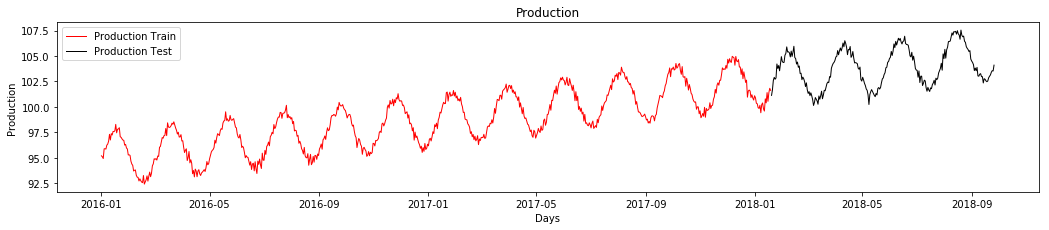

In [71]:
plt.subplot(321)
plt.plot(train, color='red',linewidth = 1, label='Production Train')
plt.plot(test, color='black',linewidth = 1, label='Production Test')
plt.title('Production'); plt.legend(loc='best'), plt.xlabel('Days'), plt.ylabel('Production')
plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.0, wspace=0.2, hspace=0.2)

We are now ready to instatiate our model, fit the model and forecast into the future over 250 days.

* The forecast includes an estimate and confidence intervals

We will plot the results all together.  The following code was modified from and with appreciation for this online [demo](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/).

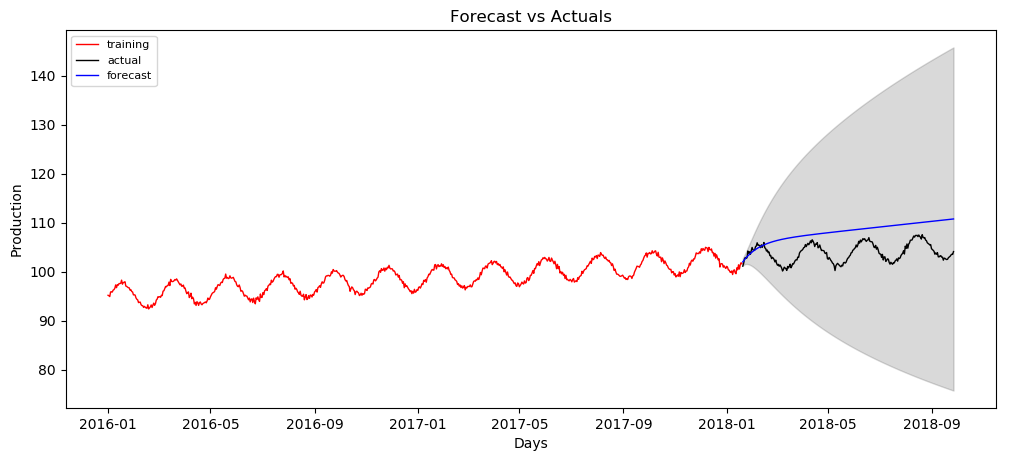

In [72]:
# the following code taken from https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
# Fit the model to training data
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast with fit model
fc, se, conf = fitted.forecast(250, alpha=0.05)  # 95% conf

# Convert estimate and confidence interval to Pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot the training, testing and forecast with confidence intervals
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training', color = 'red',linewidth = 1)
plt.plot(test, label='actual', color = 'black',linewidth = 1)
plt.plot(fc_series, label='forecast', color = 'blue',linewidth = 1)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals'); plt.xlabel('Days'); plt.ylabel('Production')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Some observations about our ability to forecast:

* the general linear trend with increasing production was captured by the model
* the short term forecast is quite good, but fails to capture the cycles
* the model confidence interval expands rapidly with distance into the future 

We could have improved model performance by manually removing the trend and cycle and modeling the residual.

### Summary 

Here's some observations from this workflow.

* We need to check time series for stationarity

* If time series are nonstationary we should rectify with trend removal or differencing

* We can measure the degree of temporal correlation with autocorrelation 

* ARIMA models allow us to simultaneously capture trend, seasonality and residual components in a single model

#### Comments

This was a basic demonstration of time series analysis, modeling and forecasting. 

The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Michael*

***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

